In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append("..")  

#for development purposes
%reload_ext autoreload
%autoreload 2
pd.options.display.float_format = '{:.4g}'.format

import enlopy as el

## Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

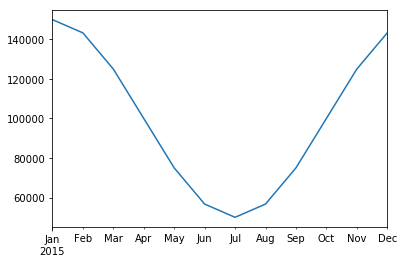

In [2]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.plot()

Create normalized random daily load for a working and non-working day

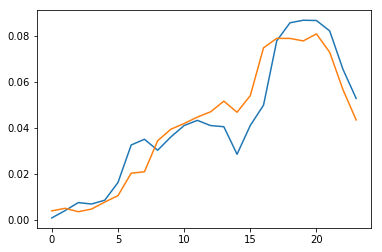

In [3]:
DWL =  el.gen_daily_stoch_el() #daily load working

DNWL = el.gen_daily_stoch_el() #daily load non working

plt.plot(DNWL)
plt.plot(DWL)

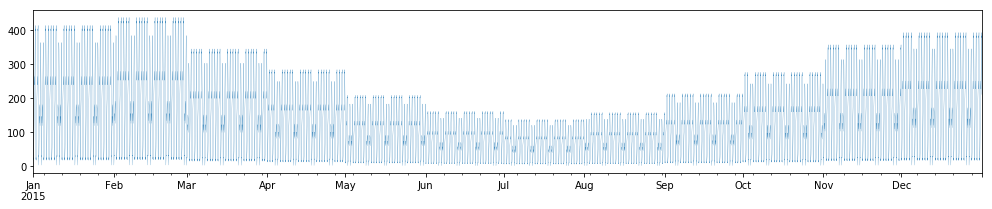

In [4]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name = 'House1'
Load1.plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the total sum of energy is the same

In [5]:
print 'error = {:.2f}'.format(Load1.sum() - ML.sum())

error = -0.00


## Reshape (days - hours) and plot heatmap 

In [6]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,454,435.6,378.3,309.3,220.2,175.3,155.8,166.5,231.9,302.7,375,446.6
1,700.2,669.6,583.5,469,347.9,265.9,234.9,263,351.8,466.8,582.4,673.2
2,664.5,632.4,553.7,434.5,341.1,246.3,215.7,257.8,325.9,443,558.1,618.2
3,770.3,734.6,641.9,508.8,390.1,288.5,253.5,294.9,381.6,513.5,644.4,726.7
4,1175,1122,979,781.4,589.2,443.1,390.4,445.4,586.1,783.2,979.9,1119
5,1779,1697,1483,1174,902.4,665.7,584.8,682.2,880.5,1186,1489,1676
6,3494,3331,2912,2303,1774,1306,1147,1341,1727,2330,2926,3287
7,3658,3486,3048,2408,1860,1365,1199,1406,1806,2439,3064,3435
8,4998,4777,4165,3341,2490,1894,1672,1882,2506,3332,4160,4792


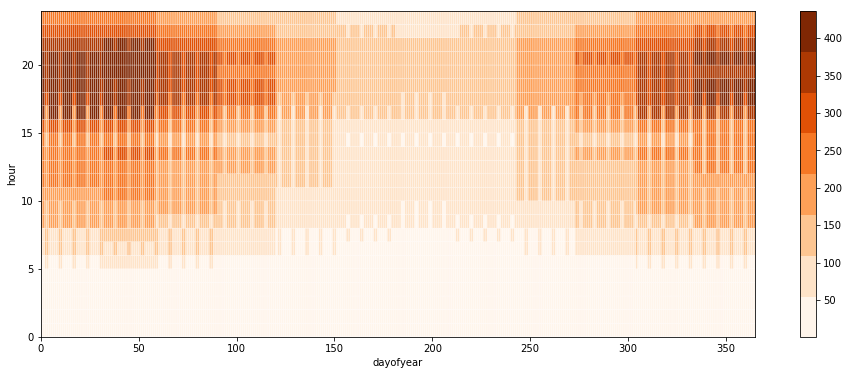

In [7]:
el.plot_heatmap(Load1)

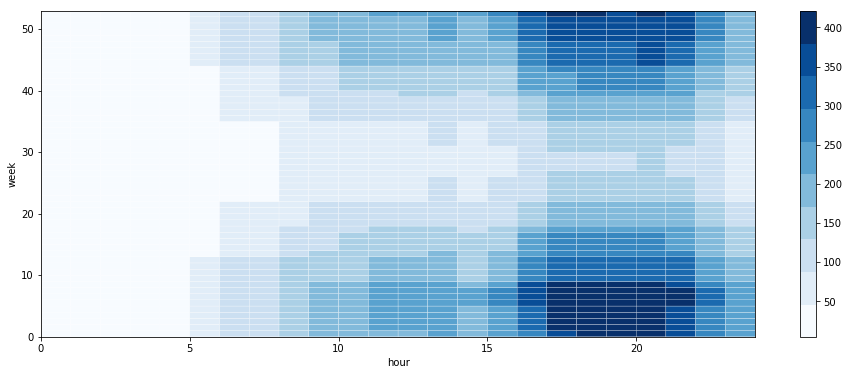

In [8]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', palette='Blues')

### Plot percentiles

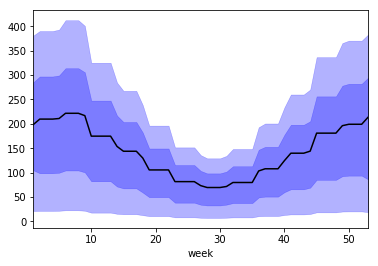

In [9]:
el.plot_percentiles(Load1, x='week', zz='hour')

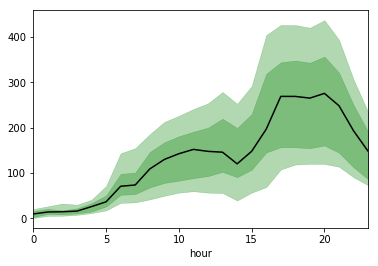

In [10]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

### 3d plots

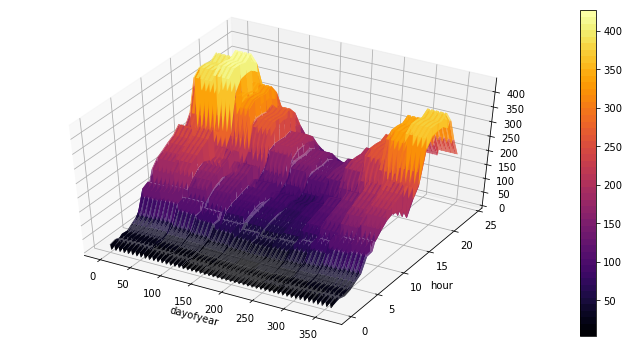

In [11]:
el.plot_3d(Load1, bins=50, palette='inferno')

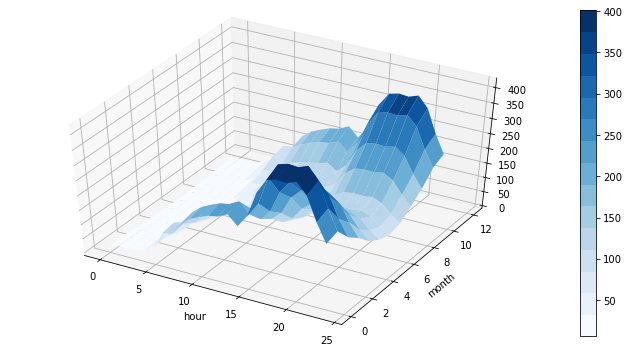

In [12]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', palette='Blues')

### Boxplot

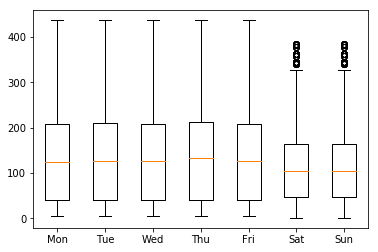

In [13]:
el.plot_boxplot(Load1, by='day')

### Rugplot

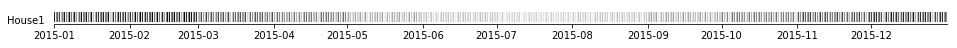

In [14]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

It can accept a dataframe of timeseries and optionally normalize by the maximum value of the whole DataFrame


In [15]:
# Generate dummy dataframe of load profiles
df_many = pd.concat([Load1, 3 * Load1, Load1['Jun 2015':'Nov 2015']], axis=1)
df_many.columns = ['House1', 'House2', 'House3']

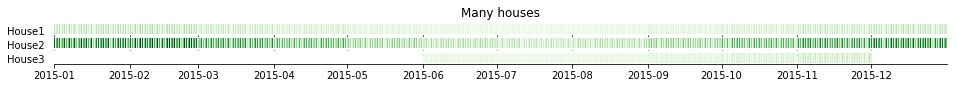

In [16]:
el.plot_rug(df_many, cmap='Greens', fig_title='Many houses', normalized=True)

## Archetypes

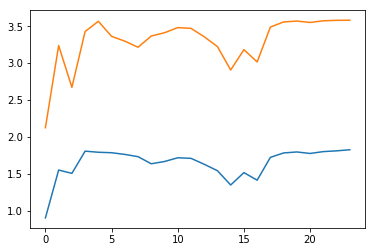

In [17]:
plt.plot(el.get_load_archetypes(Load1,2));

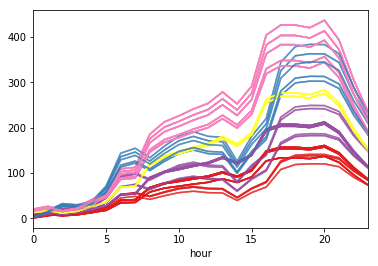

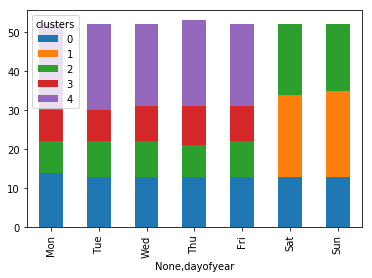

In [18]:
el.get_load_archetypes(Load1, 5, plot_diagnostics=True);

## Get and plot Load Duration Curve of load

In [19]:
el.get_LDC(Load1)

(array([  1.14155251e-04,   2.28310502e-04,   3.42465753e-04, ...,
          9.99771689e-01,   9.99885845e-01,   1.00000000e+00]),
 array([ 436.7997863 ,  436.7997863 ,  436.7997863 , ...,    1.01315935,
           1.01315935,    1.01315935]))

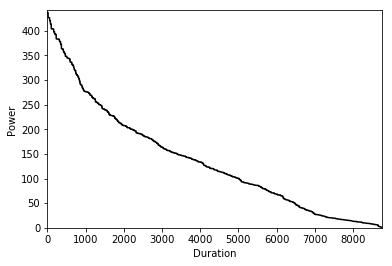

In [20]:
el.plot_LDC(Load1, x_norm=False)

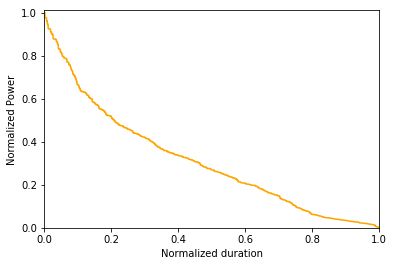

In [21]:
el.plot_LDC(Load1, y_norm=True, color='Orange')

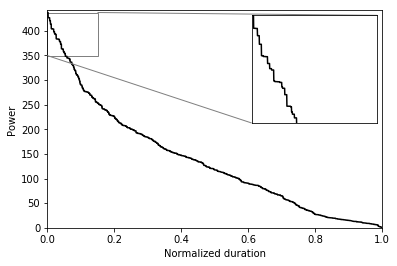

In [22]:
el.plot_LDC(Load1, zoom_peak=True)

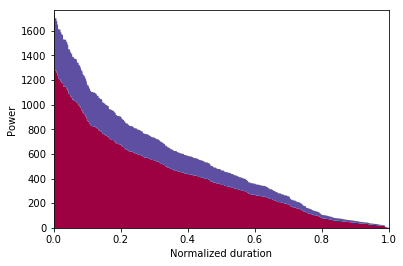

In [23]:
#Works also for 2-D
el.plot_LDC(df_many[['House1', 'House2']])

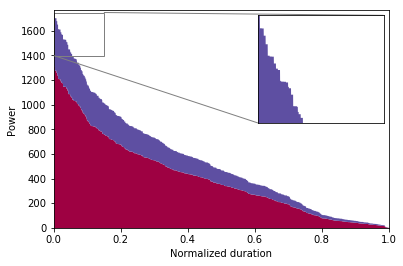

In [24]:
el.plot_LDC(df_many[['House1', 'House2']],zoom_peak=True)

# Add noise to a load

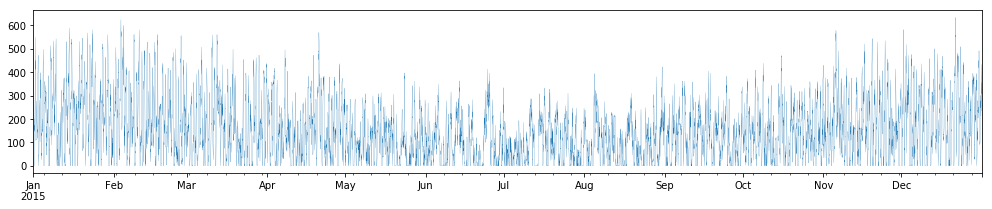

In [25]:
Load1_noise = el.add_noise(Load1, 3, 100) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

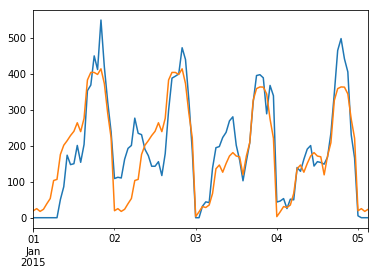

In [26]:
Load1_noise.iloc[0:100].plot()
Load1.iloc[0:100].plot()

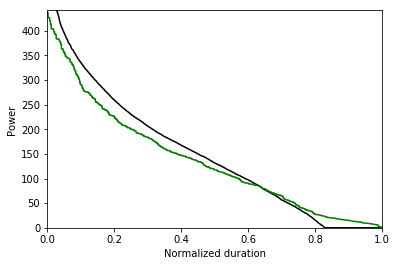

In [27]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1, color='g')

## Gather statistics

In [28]:
el.get_load_stats(Load1)

,2015
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3136
Load ratio (max/min),431.1
Max,436.8
Min (2%),1.013
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-138.838192742, 73.0085452473)"
Sum,1.2e+06
Total Zero load duration,0


We can also check the statistics per defined time period. Example for month ('m'):

In [29]:
el.get_load_stats(Load1, per='m') 

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Average,201.6,213.2,168,138.9,100.8,78.75,67.2,76.21,104.2,134.4,173.6,192.6
Biggest duration of consecutive zero load,0,0,0,0,0,0,0,0,0,0,0,0
Load Factor (peakiness),0.4878,0.4882,0.4878,0.49,0.4847,0.49,0.4908,0.4847,0.49,0.4878,0.4869,0.4908
Load ratio (max/min),135.2,135.2,135.2,135.2,135.2,135.2,135.2,135.2,135.2,135.2,135.2,135.2
Max,413.3,436.8,344.4,283.5,208,160.7,136.9,157.2,212.6,275.6,356.6,392.4
Min (2%),3.058,3.232,2.549,2.097,1.539,1.189,1.013,1.163,1.573,2.039,2.638,2.904
Periodicity,"(124.0, 23.0)","(112.0, 24.0)","(124.0, 23.0)","(180.0, 24.0)","(124.0, 23.0)","(120.0, 22.0)","(124.0, 23.0)","(124.0, 23.0)","(180.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)"
Ramps (98%),"(-202.454454432, 106.437345334)","(-213.946796657, 112.479269191)","(-168.71204536, 88.6977877782)","(-138.838192742, 72.9920648467)","(-101.857926451, 53.550253182)","(-78.7194917769, 41.3855736308)","(-67.0695269553, 35.2607820952)","(-77.0028673456, 40.4830844862)","(-104.128644556, 54.7440486351)","(-134.969636288, 70.9582302225)","(-174.660226446, 91.8249533729)","(-192.222968074, 101.058297242)"
Sum,1.5e+05,1.433e+05,1.25e+05,1e+05,7.5e+04,5.67e+04,5e+04,5.67e+04,7.5e+04,1e+05,1.25e+05,1.433e+05
Total Zero load duration,0,0,0,0,0,0,0,0,0,0,0,0


## Load Shifting

The following function performs load shifting  (or peak shaving) from peak to off-peak timesteps based on given specifications, percentage of peak reduction and percentage of hours per month to peak.

In [30]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

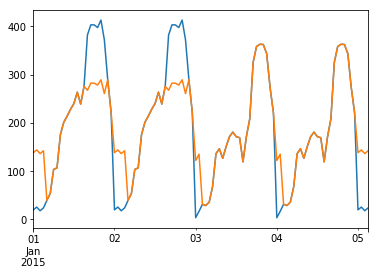

In [31]:
Load1[0:100].plot()
Load1_DR[0:100].plot()

In [32]:
el.get_load_stats(Load1)

,2015
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3136
Load ratio (max/min),431.1
Max,436.8
Min (2%),1.013
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-138.838192742, 73.0085452473)"
Sum,1.2e+06
Total Zero load duration,0


As shown below it is less peaky as expected

In [33]:
el.get_load_stats(Load1_DR)

,2015
Average,135
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3518
Load ratio (max/min),40.81
Max,383.7
Min (2%),9.401
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-86.6207412805, 60.2567813441)"
Sum,1.182e+06
Total Zero load duration,0


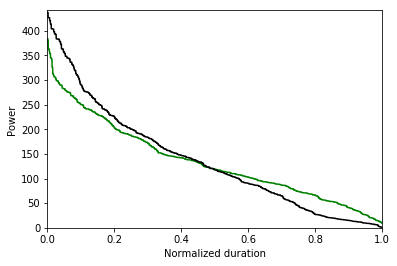

In [34]:
el.plot_LDC(Load1_DR, color='g')
el.plot_LDC(Load1)

## Sample new loads from load duration curve

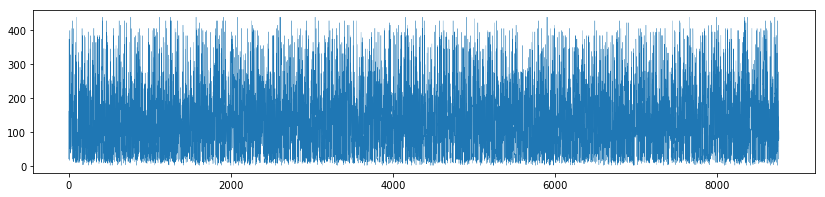

In [35]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

Check whether they have the same distribution

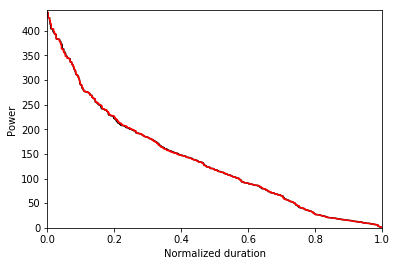

In [36]:
el.plot_LDC(Load1a)
el.plot_LDC(Load1,color='red')